## 算法比较

- 如何来设计实验比较不同的机器学习算法
- 可重复利用、用来评估算法性能的模板
- 可视化算法比较结果

### 选择最佳机器学习算法

每种模型都有各自适合处理的数据特征，通过交叉验证等抽样验证方式可以得到每种模型的准确度，并选择合适问题的算法，找到1-2中最适合问题的算法。    
- 应用不同维度来审查数据，也适用于选择算法模型
- 可视化方式展示评价准确度、方差等属性

### 机器学习算法的比较

使用相同的数据和方法来评估不同的算法，以便得到一个准确的结果。    
下面使用同一个数据集来比较六种分类算法，以便选择合适的算法来解决问题
- 逻辑回归 LR
- 线性判别分析 LDA
- K近邻 KNN
- 分类与回归树 CART
- 贝叶斯分类器
- 支持向量机 SVM


LR: 0.770 (0.048)
LDA: 0.773 (0.052)
KNN: 0.727 (0.062)
CART: 0.707 (0.066)
SVM: 0.651 (0.072)
NB: 0.755 (0.043)


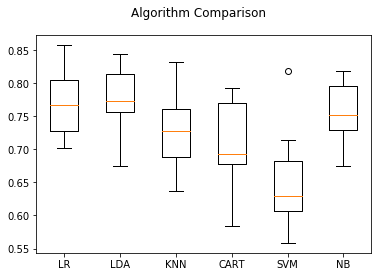

In [3]:
import pandas as pd
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

filename = 'pima_data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(filename, names=names)
array = data.values
X = array[:, 0:8]
Y = array[:, 8]
num_folds = 10
seed =7
kfold = KFold(n_splits=num_folds, random_state=seed)

models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['SVM'] = SVC()
models['NB'] = GaussianNB()

results = []
for name in models:
    result = cross_val_score(models[name], X, Y, cv=kfold)
    results.append(result)
    msg = '%s: %.3f (%.3f)' % (name, result.mean(), result.std())
    print(msg)
    
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()